In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("train.csv")

In [8]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df.drop(columns=["Unnamed: 0", "id"], inplace=True)
df.dropna(inplace=True)

In [11]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [12]:
# convert categorical values
categorical_cols = df.select_dtypes(include="object").columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [13]:
# standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

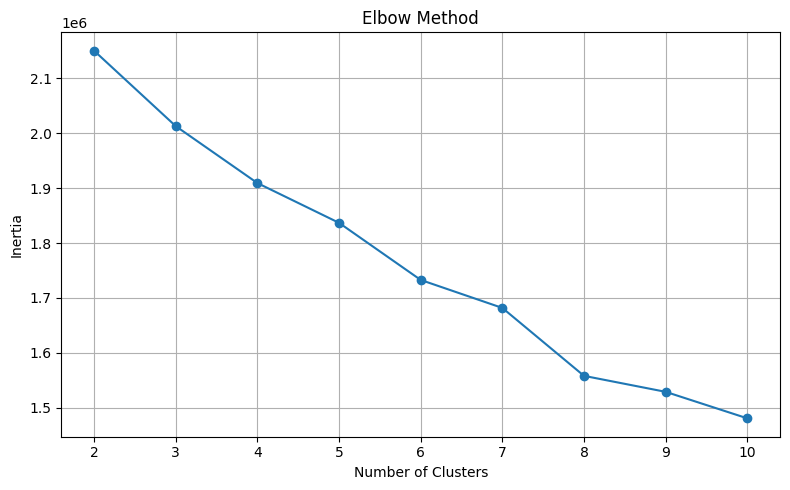

In [14]:
# Elbow method
inertia = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.savefig("elbow_method.png")
plt.show()

In [15]:
#K-Means Clustering
optimal_k = 4  #From Elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_encoded["Cluster"] = kmeans.fit_predict(scaled_data)

In [16]:
#PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
df_encoded["PCA1"] = pca_components[:, 0]
df_encoded["PCA2"] = pca_components[:, 1]

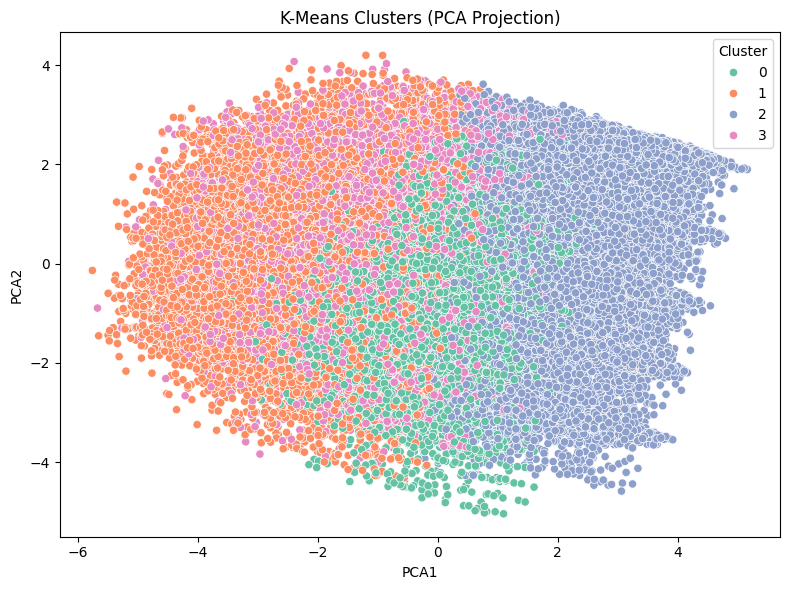

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_encoded, x="PCA1", y="PCA2", hue="Cluster", palette="Set2")
plt.title("K-Means Clusters (PCA Projection)")
plt.tight_layout()
plt.savefig("kmeans_clusters_pca.png")
plt.show()

/tmp/ipython-input-3155409406.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_clusters, x='Cluster', y='Count', palette=colors)


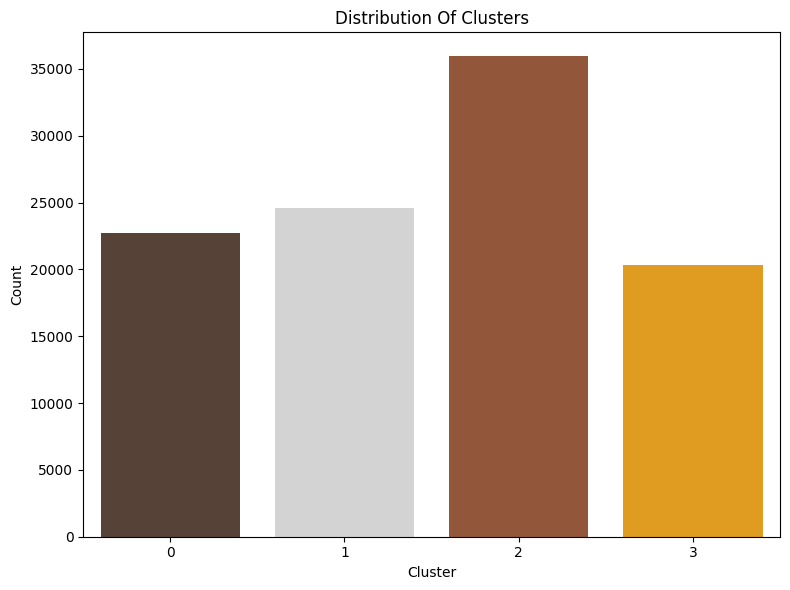

In [18]:
# cluster diagram
cluster_counts = df_encoded["Cluster"].value_counts().sort_index()
df_clusters = pd.DataFrame({'Cluster': cluster_counts.index, 'Count': cluster_counts.values})
colors = ['#5c4033', '#d3d3d3', '#a0522d', '#ffa500']  # dark brown, light gray, brown, orange

plt.figure(figsize=(8, 6))
sns.barplot(data=df_clusters, x='Cluster', y='Count', palette=colors)
plt.title('Distribution Of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig("distribution_of_clusters.png")
plt.show()

In [19]:
numeric_cols = df_encoded.select_dtypes(include=np.number).columns.drop(["Cluster", "PCA1", "PCA2"])
cluster_summary = df_encoded.groupby("Cluster")[numeric_cols].mean()
cluster_summary.to_csv("cluster_summary.csv")
print(cluster_summary)

               Age  Flight Distance  Inflight wifi service  \
Cluster                                                      
0        35.314926       730.636184               2.402770   
1        32.085107       839.530140               2.360373   
2        43.208202      1684.866726               3.266910   
3        45.975564      1249.148139               2.592409   

         Departure/Arrival time convenient  Ease of Online booking  \
Cluster                                                              
0                                 3.341262                2.329611   
1                                 2.912003                2.535879   
2                                 3.028964                3.146657   
3                                 2.979498                2.813413   

         Gate location  Food and drink  Online boarding  Seat comfort  \
Cluster                                                                 
0             2.957397        4.029061         2.594944     